In [13]:
import numpy as np
import os
import sys
import math
import torch
import time
import re
import cv2
from pathlib import Path
import pandas as pd
from tqdm import tqdm
from matplotlib import pyplot as plt
from torchvision import transforms
# from icecream import ic
from itertools import repeat
import random
# import sympy as sy
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
from copy import deepcopy

# 分类树

## 分类树属性列表

- classes_
- feature_importances_
- max_feature_
- n_classes_
- n_features_
- n_outputs_
- tree

## 加载数据集

In [11]:
from sklearn import tree
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split

In [12]:
wine = load_wine()
wine

{'data': array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
         1.065e+03],
        [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
         1.050e+03],
        [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
         1.185e+03],
        ...,
        [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
         8.350e+02],
        [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
         8.400e+02],
        [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
         5.600e+02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1

In [16]:
wine.feature_names

['alcohol',
 'malic_acid',
 'ash',
 'alcalinity_of_ash',
 'magnesium',
 'total_phenols',
 'flavanoids',
 'nonflavanoid_phenols',
 'proanthocyanins',
 'color_intensity',
 'hue',
 'od280/od315_of_diluted_wines',
 'proline']

In [15]:
pd.concat([pd.DataFrame(wine.data), pd.DataFrame(wine.target)], axis=1)

,0,1,2,3,4,5,6,7,8,9,10,11,12,0
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0,2
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0,2
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0,2
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0,2


In [17]:
xtrain, xtest, ytrain, ytest = train_test_split(wine.data, wine.target, test_size=0.3)

## 实现一棵树

In [54]:
clf = tree.DecisionTreeClassifier(criterion='entropy'
                                  , random_state=30
                                  , splitter="random"
                                  , max_depth=3
                                  , min_samples_leaf=10
                                  , min_samples_split=10
                                 )
clf = clf.fit(xtrain, ytrain)
score = clf.score(xtest, ytest)
score

0.8703703703703703

In [45]:
clf = tree.DecisionTreeClassifier(criterion='gini')
clf = clf.fit(xtrain, ytrain)
score = clf.score(xtest, ytest)
score

0.9259259259259259

0.9074074074074074

In [22]:
# %pip install graphviz

Looking in indexes: https://pypi.tuna.tsinghua.edu.cn/simple
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.0/47.0 kB 2.9 MB/s eta 0:00:00

[notice] A new release of pip is available: 23.0.1 -> 23.2
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [23]:
import graphviz

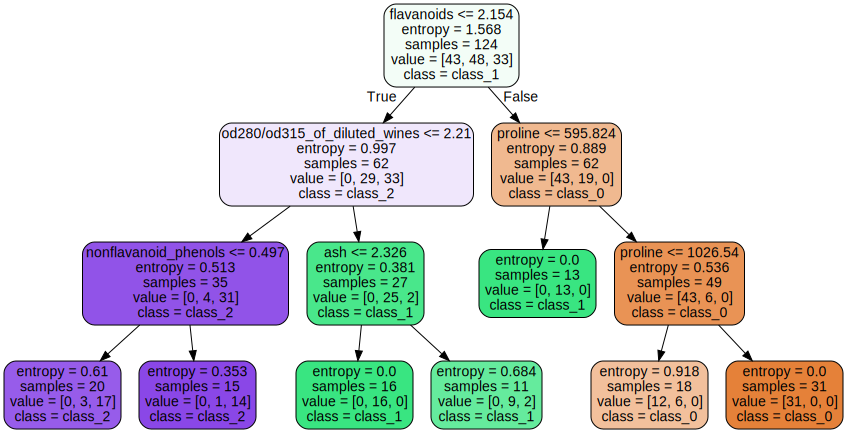

In [55]:
dot_data = tree.export_graphviz(clf
                                ,feature_names=wine.feature_names
                                ,class_names=wine.target_names
                                ,filled=True
                                ,rounded=True
)
graph = graphviz.Source(dot_data)
graph

In [48]:
clf.feature_importances_

array([0.10211341, 0.        , 0.01416775, 0.        , 0.        ,
       0.        , 0.43056025, 0.        , 0.        , 0.13762377,
       0.        , 0.        , 0.31553482])

In [49]:
[*zip(wine.feature_names, clf.feature_importances_)]

[('alcohol', 0.10211341292444666),
 ('malic_acid', 0.0),
 ('ash', 0.014167751866219987),
 ('alcalinity_of_ash', 0.0),
 ('magnesium', 0.0),
 ('total_phenols', 0.0),
 ('flavanoids', 0.43056024510559066),
 ('nonflavanoid_phenols', 0.0),
 ('proanthocyanins', 0.0),
 ('color_intensity', 0.13762377357637506),
 ('hue', 0.0),
 ('od280/od315_of_diluted_wines', 0.0),
 ('proline', 0.31553481652736753)]

## 剪枝参数调优

- max_depth
- min_samples_leaf
- min_samples_split
- max_features
- min_impurity_decrease

0.9444444444444444

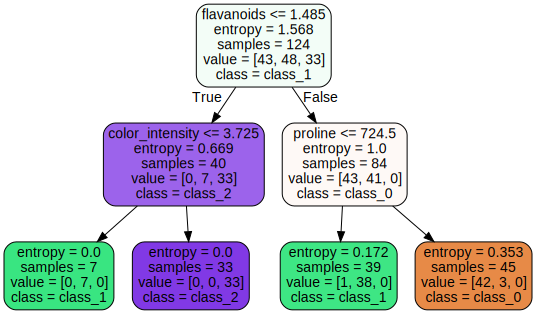

In [95]:
clf = tree.DecisionTreeClassifier(criterion='entropy'
                                  , random_state=0
                                  , splitter="best"
                                  , max_depth=3
                                  , min_samples_leaf=5
                                  , min_samples_split=10
                                  , max_features=10
                                  , min_impurity_decrease=0.1
                                 )
clf = clf.fit(xtrain, ytrain)
score = clf.score(xtest, ytest)
score
dot_data = tree.export_graphviz(clf
                                ,feature_names=wine.feature_names
                                ,class_names=wine.target_names
                                ,filled=True
                                ,rounded=True
)
graph = graphviz.Source(dot_data)
graph

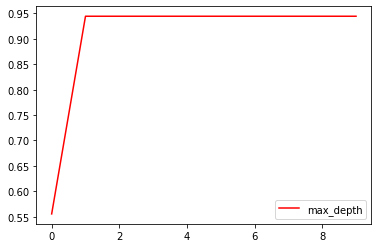

In [92]:
from matplotlib import pyplot as plt
test = []
for i in range(10):
    clf = tree.DecisionTreeClassifier(criterion='entropy'
                                  , random_state=0
                                  , splitter="best"
                                  , max_depth=i + 1
                                  , min_samples_leaf=5
                                  , min_samples_split=10
                                  , max_features=10
                                  , min_impurity_decrease=0.1
                                 )
    clf = clf.fit(xtrain, ytrain)
    score = clf.score(xtest, ytest)
    test.append(score)
plt.plot(test, color="red", label="max_depth")
plt.legend()
plt.show()

## 重要属性和接口

- class weight
- min_weight_fraction_leaf

0.9444444444444444

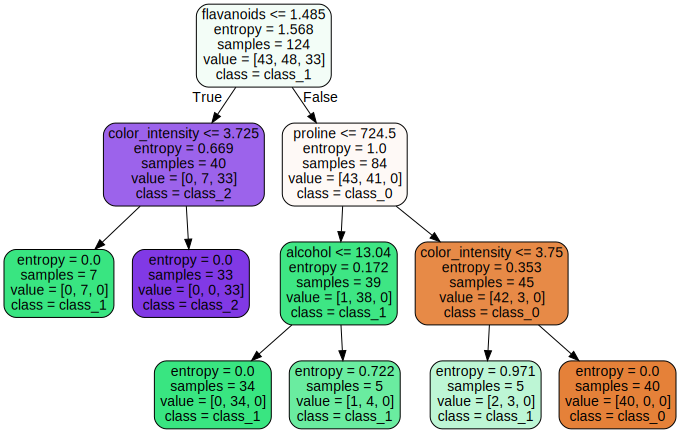

In [104]:
clf = tree.DecisionTreeClassifier(criterion='entropy'
                                  , random_state=0
                                  , splitter="best"
                                  , max_depth=5
                                  , min_samples_leaf=5
                                  , min_samples_split=5
                                  , max_features=20
                                  , min_impurity_decrease=0.01
                                 )
clf = clf.fit(xtrain, ytrain)
score = clf.score(xtest, ytest)
score
dot_data = tree.export_graphviz(clf
                                ,feature_names=wine.feature_names
                                ,class_names=wine.target_names
                                ,filled=True
                                ,rounded=True
)
graph = graphviz.Source(dot_data)
graph

- apply
- predict

In [105]:
clf.apply(xtest)

array([10,  6, 10, 10,  6,  3,  3,  6,  7,  2, 10,  7,  6, 10,  7,  6,  9,
        3, 10,  3, 10,  6,  6,  2, 10,  6,  6, 10,  2, 10,  3,  3, 10,  6,
       10,  3,  6,  2, 10,  3, 10,  6,  3,  6,  3, 10,  6,  3,  9,  6,  3,
        3,  3,  3])

In [97]:
clf.predict(xtest)

array([0, 1, 0, 0, 1, 2, 2, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 2, 0, 2, 0, 1,
       1, 1, 0, 1, 1, 0, 1, 0, 2, 2, 0, 1, 0, 2, 1, 1, 0, 2, 0, 1, 2, 1,
       2, 0, 1, 2, 0, 1, 2, 2, 2, 2])

# 回归树

## 一维回归图像

In [106]:
from sklearn.tree import DecisionTreeRegressor

In [110]:
rng = np.random.RandomState(1)
x = np.sort(5*rng.rand(80, 1), axis=0)
y = np.sin(x).ravel()
y[::5] += 3 * (0.5 - rng.rand(16))
x.shape, y.shape

((80, 1), (80,))

In [117]:
regr_1 = DecisionTreeRegressor(max_depth=2)
regr_2 = DecisionTreeRegressor(max_depth=5)
regr_1.fit(x, y)
regr_2.fit(x, y)

DecisionTreeRegressor(max_depth=2)

DecisionTreeRegressor(max_depth=5)

In [118]:
x_test = np.arange(0.0, 5.0, 0.01)[:, np.newaxis]
x_test.shape
y_1 = regr_1.predict(x_test)
y_2 = regr_2.predict(x_test)

(500, 1)

<Figure size 432x288 with 0 Axes>

Text(0.5, 0, 'data')

Text(0, 0.5, 'target')

Text(0.5, 1.0, 'Decision Tree Regression')

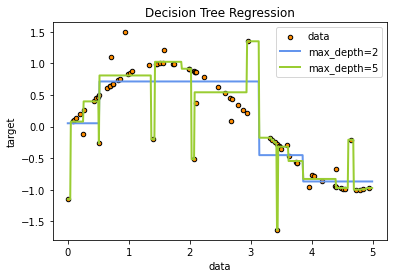

In [119]:
plt.figure()
plt.scatter(x,  y, s=20, edgecolors="black", c="darkorange", label="data")
plt.plot(x_test, y_1, color="cornflowerblue", label="max_depth=2", linewidth=2)
plt.plot(x_test, y_2, color="yellowgreen", label="max_depth=5", linewidth=2)
plt.xlabel("data")
plt.ylabel("target")
plt.title("Decision Tree Regression")
plt.legend()
plt.show()

## 交叉验证

In [120]:
from sklearn.datasets import load_boston
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor

In [123]:
boston = load_boston()
boston.data.shape, boston.target.shape

/home/wenquanshan/miniconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np

        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California hous

((506, 13), (506,))

In [124]:
regressor = DecisionTreeRegressor(random_state=0)
cross_val_score(regressor, boston.data, boston.target, cv=10, scoring="neg_mean_squared_error")

array([-18.08941176, -10.61843137, -16.31843137, -44.97803922,
       -17.12509804, -49.71509804, -12.9986    , -88.4514    ,
       -55.7914    , -25.0816    ])